In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import locale
locale.setlocale(locale.LC_ALL, 'sr_RS.UTF-8')
def form(value):
    if isinstance(value, (int, float, np.number)):
        return locale.format_string('%.2f', value, grouping=True)
    return str(value)
pd.options.display.float_format = lambda x: form(x)
np.set_printoptions(formatter={'all': lambda x: form(x)})

In [4]:
df = pd.read_stata('TU.dta')

In [5]:
df.head(10)

,zene,starost,satiRada,plata,region,urban,obr3,obrazovanje
0,Zena,47,"42,00",28000,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
1,Muskarac,58,"42,00",9000,Sumadija i Zapadna Srbija,Grad,Osnovno skola ili manje,"8,00"
2,Muskarac,24,"42,00",11000,Sumadija i Zapadna Srbija,Grad,Osnovno skola ili manje,"8,00"
3,Zena,40,"48,00",23000,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
4,Muskarac,46,"48,00",31000,Sumadija i Zapadna Srbija,Grad,Visoko obrazovanje,"16,00"
5,Muskarac,49,"42,00",11000,Sumadija i Zapadna Srbija,Grad,Visoko obrazovanje,"16,00"
6,Zena,40,"42,00",11000,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
7,Muskarac,46,"42,00",14500,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
8,Zena,43,"42,00",19800,Sumadija i Zapadna Srbija,Grad,Visoko obrazovanje,"14,00"
9,Zena,32,"4,00",12200,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   zene         5141 non-null   category
 1   starost      5141 non-null   int8    
 2   satiRada     5135 non-null   float64 
 3   plata        5141 non-null   int32   
 4   region       5141 non-null   category
 5   urban        5141 non-null   category
 6   obr3         5141 non-null   category
 7   obrazovanje  5141 non-null   float32 
dtypes: category(4), float32(1), float64(1), int32(1), int8(1)
memory usage: 106.1 KB


In [7]:
df = df[df['satiRada'].isna() == 0]

In [8]:
print(df['satiRada'].unique(),'\n',df['obrazovanje'].unique())

[42,00 48,00 4,00 70,00 56,00 80,00 30,00 28,00 40,00 8,00 60,00 35,00
 0,00 5,00 52,00 50,00 75,00 20,00 45,00 84,00 99,00 18,00 12,00 16,00
 33,00 36,00 65,00 55,00 88,00 2,00 25,00 9,00 7,00 10,00 1,00 49,00 54,00
 15,00 24,00 53,00 17,00 90,00 66,00 39,00 72,00 100,00 85,00 47,00 74,00
 44,00 58,00 21,00 63,00 96,00 32,00 43,00 46,00 37,00 3,00 6,00 38,00
 22,00 26,00 91,00 14,00 62,00 105,00 64,00 98,00 126,00 68,00 78,00 77,00
 13,00 51,00 34,00 23,00 59,00 31,00 67,00 57,00] 
 [12,00 8,00 16,00 14,00 4,00 11,00 0,00 18,00 10,00 20,00]


In [9]:
df['obrazovanje'] = df['obrazovanje'].astype(int)
df['satiRada'] = df['satiRada'].astype(int)

In [10]:
df.describe()

,starost,satiRada,plata,obrazovanje
count,"5.135,00","5.135,00","5.135,00","5.135,00"
mean,"42,04","43,53","20.435,09","11,31"
std,"11,84","17,41","14.760,90","2,98"
min,"16,00","0,00","500,00","0,00"
25%,"33,00","40,00","12.000,00","11,00"
50%,"42,00","40,00","18.000,00","12,00"
75%,"51,00","50,00","25.000,00","12,00"
max,"84,00","126,00","230.000,00","20,00"


In [11]:
df = df[(df['satiRada'] > 0) & (((df['starost'] < 65) & (df['zene'] == 'Muskarac')) | ((df['starost']< 60) & (df['zene'] == 'Zena')))]
df.describe()

,starost,satiRada,plata,obrazovanje
count,"4.776,00","4.776,00","4.776,00","4.776,00"
mean,"40,94","45,08","20.903,81","11,51"
std,"10,70","15,39","14.459,53","2,73"
min,"16,00","1,00","500,00","0,00"
25%,"32,00","40,00","12.000,00","11,00"
50%,"41,00","40,00","18.000,00","12,00"
75%,"50,00","50,00","25.000,00","12,00"
max,"64,00","126,00","200.000,00","20,00"


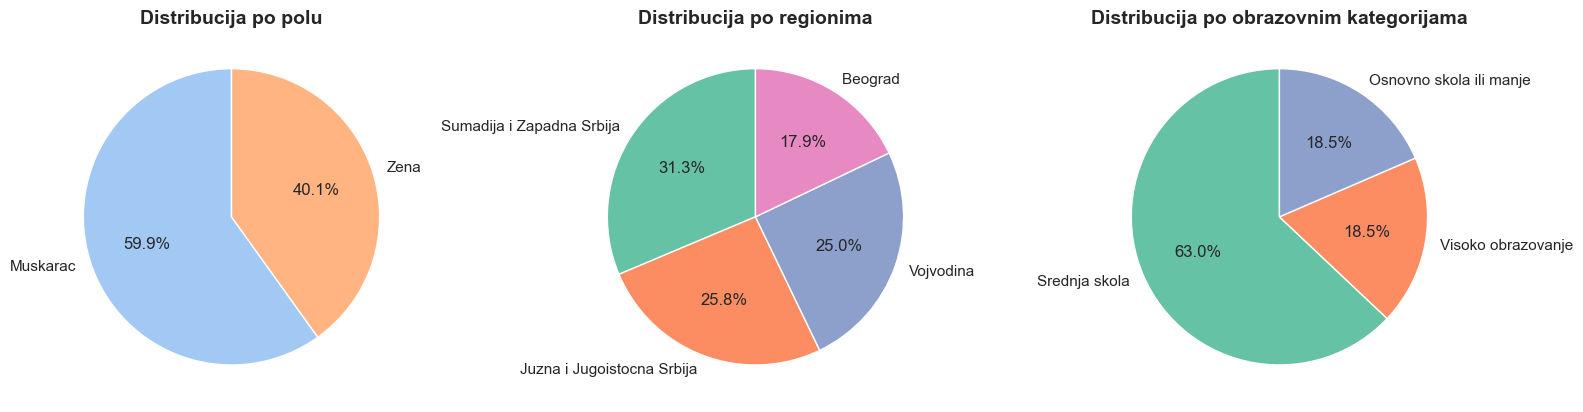

In [12]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
pol_counts = df['zene'].value_counts()
plt.pie(pol_counts, labels=pol_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("pastel", len(pol_counts)), labeldistance=1.1)
plt.title('Distribucija po polu', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 2)
region_counts = df['region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2", len(region_counts)), labeldistance=1.1)
plt.title('Distribucija po regionima', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
obr3_counts = df['obr3'].value_counts()
plt.pie(obr3_counts, labels=obr3_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2", len(obr3_counts)), labeldistance=1.1)
plt.title('Distribucija po obrazovnim kategorijama', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

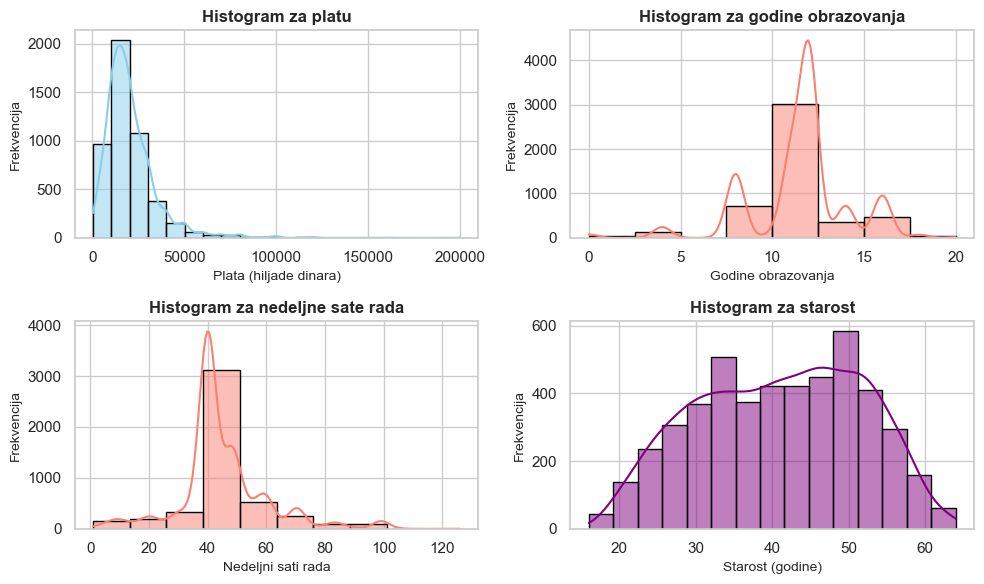

In [13]:
plt.figure(figsize=(10, 6)) 

plt.subplot(2, 2, 1)
sns.histplot(df['plata'], bins=20, kde=True, color='skyblue', edgecolor='black', stat="count")
plt.title('Histogram za platu', fontsize=12, fontweight='bold')
plt.xlabel('Plata (hiljade dinara)', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)  

plt.subplot(2, 2, 2)
sns.histplot(df['obrazovanje'], bins=8, kde=True, color='salmon', edgecolor='black', stat="count")
plt.title('Histogram za godine obrazovanja', fontsize=12, fontweight='bold')
plt.xlabel('Godine obrazovanja', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)  

plt.subplot(2, 2, 3)
sns.histplot(df['satiRada'], bins=10, kde=True, color='salmon', edgecolor='black', stat="count")
plt.title('Histogram za nedeljne sate rada', fontsize=12, fontweight='bold')
plt.xlabel('Nedeljni sati rada', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)

plt.subplot(2, 2, 4) 
sns.histplot(df['starost'], bins=15, kde=True, color='purple', edgecolor='black', stat="count")
plt.title('Histogram za starost', fontsize=12, fontweight='bold')
plt.xlabel('Starost (godine)', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
stats.jarque_bera(df['plata'])

SignificanceResult(statistic=56177.39382059841, pvalue=0.0)

In [15]:
mi3, mi4 = [((df['plata'] - df['plata'].mean())**momenat).mean() for momenat in [3,4]]

In [16]:
sigma3, sigma4 = [(((df['plata'] - df['plata'].mean()) ** 2) ** momenat / 2).mean() for momenat in [3,4]]

In [17]:
S, K = mi3 / sigma3, mi4 / sigma4

In [18]:
df['satnica'] = df['plata'] / (df['satiRada'] * (52 / 12))

In [19]:
for var in ['satiRada', 'satnica']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    donjaGranica = Q1 - 1.5*IQR
    gornjaGranica = Q3 + 1.5*IQR

    ukupnoIzbaceno = len(df[(df[var] < donjaGranica) | (df[var] > gornjaGranica)])
    df = df[(df[var] >= donjaGranica) & (df[var] <= gornjaGranica)].reset_index(drop = True)
    print(f'Iz baze je izbacen svaki ispitanik kod koga je {var} manja od {donjaGranica}, odnosno veca od {gornjaGranica}.')
    print(f'Iz baze je izbaceno  {ukupnoIzbaceno} outliera')
    print(f'Nakon izbacivanja outliera: {len(df)}')

Iz baze je izbacen svaki ispitanik kod koga je satiRada manja od 25.0, odnosno veca od 65.0.
Iz baze je izbaceno  766 outliera
Nakon izbacivanja outliera: 4010
Iz baze je izbacen svaki ispitanik kod koga je satnica manja od -43.269230769230816, odnosno veca od 256.7307692307693.
Iz baze je izbaceno  205 outliera
Nakon izbacivanja outliera: 3805


In [20]:
df.describe()

,starost,satiRada,plata,obrazovanje,satnica
count,"3.805,00","3.805,00","3.805,00","3.805,00","3.805,00"
mean,"40,57","44,05","19.246,63","11,53","102,84"
std,"10,61","7,38","9.384,32","2,50","50,75"
min,"16,00","25,00","1.000,00","0,00","3,85"
25%,"32,00","40,00","12.000,00","11,00","65,93"
50%,"41,00","40,00","18.000,00","12,00","92,31"
75%,"49,00","48,00","25.000,00","12,00","134,62"
max,"64,00","65,00","65.000,00","20,00","256,41"


In [21]:
print((df['satnica'] < 55).sum())
df = df[df['satnica'] > 55]
df.describe()

606


,starost,satiRada,plata,obrazovanje,satnica
count,"3.199,00","3.199,00","3.199,00","3.199,00","3.199,00"
mean,"40,52","43,48","21.420,56","11,80","115,09"
std,"10,37","6,89","8.570,89","2,38","45,74"
min,"16,00","25,00","6.000,00","0,00","55,29"
25%,"32,00","40,00","15.000,00","11,00","76,92"
50%,"41,00","40,00","20.000,00","12,00","103,85"
75%,"49,00","48,00","25.500,00","12,00","144,23"
max,"64,00","65,00","65.000,00","20,00","256,41"


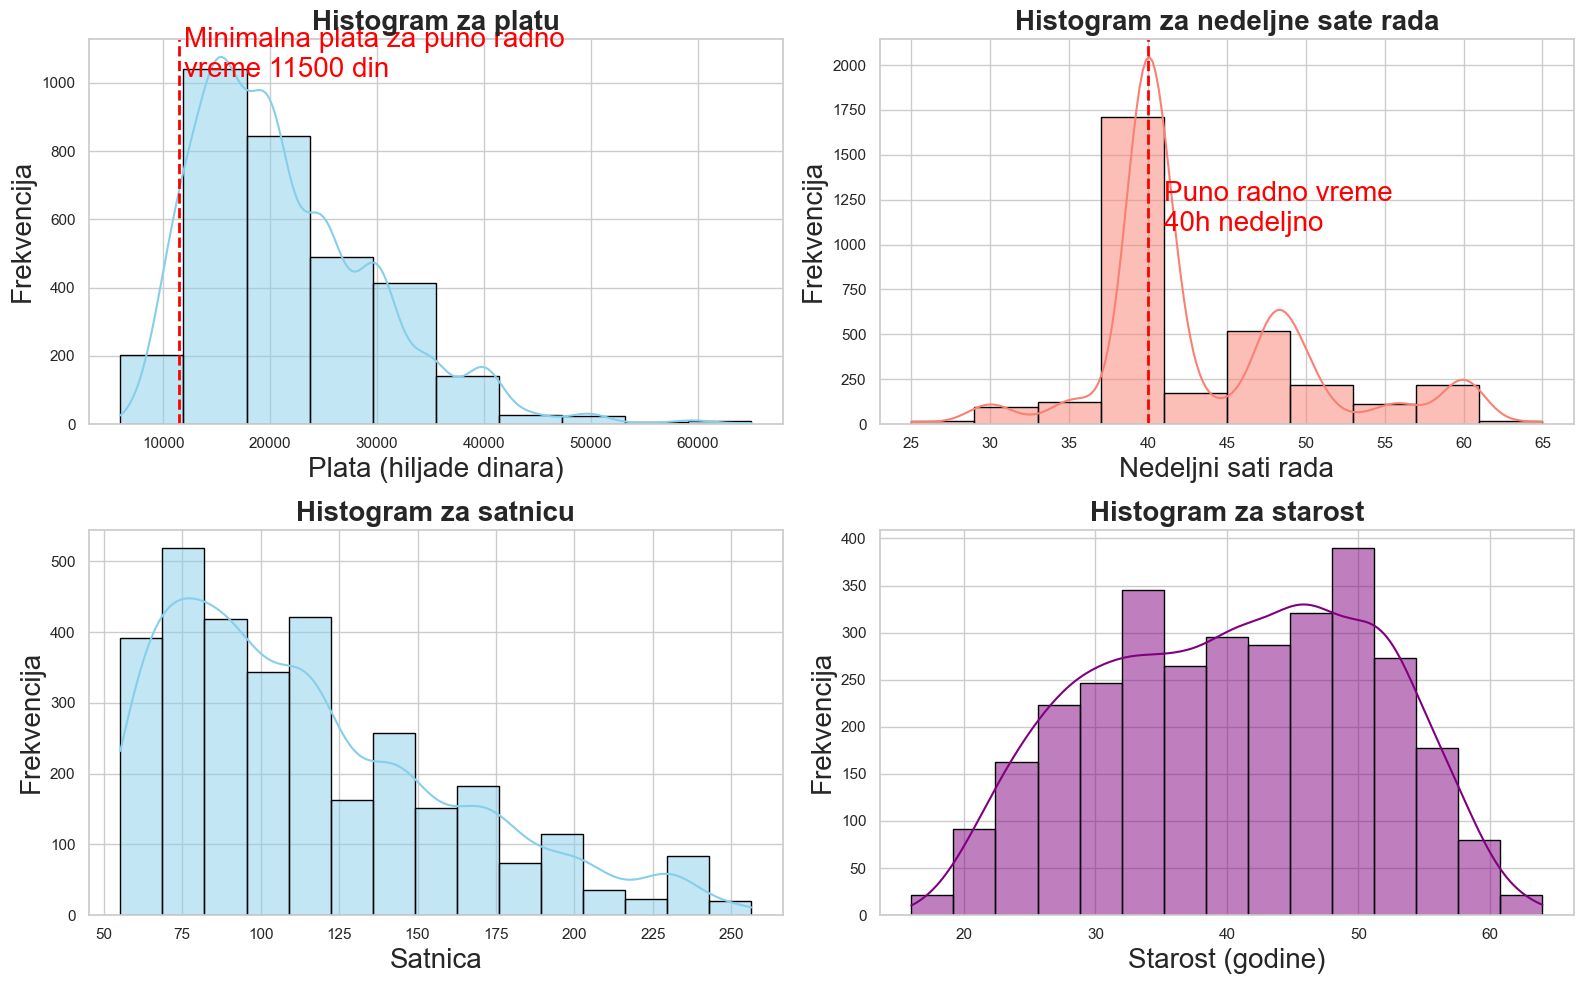

In [22]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(16, 10))  # Povećajte veličinu cele figure (slike)

plt.subplot(2, 2, 1)
sns.histplot(df['plata'], bins=10, kde=True, color='skyblue', edgecolor='black', stat="count")

plt.title('Histogram za platu', fontsize=20, fontweight='bold')
plt.xlabel('Plata (hiljade dinara)', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)

plt.axvline(x=11500, color='red', linestyle='--', linewidth=2 )
plt.text(12000, plt.ylim()[1] * 0.9, 'Minimalna plata za puno radno\nvreme 11500 din', color='red', fontsize=20)
# Dodajte mrežu
plt.grid(True)

plt.subplot(2, 2, 2)
sns.histplot(df['satiRada'], bins=10, kde=True, color='salmon', edgecolor='black', stat="count")
plt.title('Histogram za nedeljne sate rada', fontsize=20, fontweight='bold')
plt.xlabel('Nedeljni sati rada', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)
plt.axvline(x=40, color='red', linestyle='--', linewidth=2)
plt.text(41, plt.ylim()[1] * 0.5, 'Puno radno vreme\n40h nedeljno', color='red', fontsize=20)
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(df['satnica'], bins=15, kde=True, color='skyblue', edgecolor='black', stat="count")
plt.title('Histogram za satnicu', fontsize=20, fontweight='bold')
plt.xlabel('Satnica', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)
plt.grid(True)

plt.subplot(2, 2, 4) 
sns.histplot(df['starost'], bins=15, kde=True, color='purple', edgecolor='black', stat="count")
plt.title('Histogram za starost', fontsize=20, fontweight='bold')
plt.xlabel('Starost (godine)', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)
plt.grid(True)

# Podesite raspored da bi sve stalo
plt.tight_layout()

# Prikazivanje grafika
plt.show()

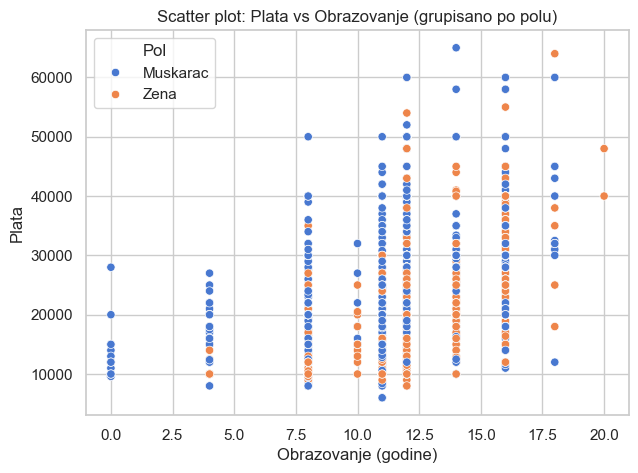

In [23]:
plt.figure(figsize=(7, 5))  

sns.scatterplot(x=df['obrazovanje'], y=df['plata'], hue=df['zene'])

plt.title('Scatter plot: Plata vs Obrazovanje (grupisano po polu)')
plt.xlabel('Obrazovanje (godine)')
plt.ylabel('Plata')

plt.legend(title='Pol')

plt.show()

In [24]:
df.iloc[df['plata'].argmax()]

zene                     Muskarac
starost                        53
satiRada                       65
plata                       65000
region                   Beograd 
urban                        Grad
obr3           Visoko obrazovanje
obrazovanje                    14
satnica                    230,77
Name: 440, dtype: object

In [25]:
class Bootstrap():
    def __init__(self, df, alfa = None, n=None):
        self.df = df
        default = [0.1, 0.05, 0.01]
        if alfa is None:
            self.alfa = default
        elif isinstance(alfa, (float, int)):
            if alfa < 0 or alfa > 1:
                raise ValueError('Alfa mora biti izmedju 1 i 0')
            self.alfa = sorted(set(default + [alfa]))
        else:
            for a in alfa:
                if a < 0 or a > 1:
                    raise ValueError('Alfa mora biti izmedju 1 i 0')
            self.alfa = sorted(set(default + list(alfa)))
        self.n = n if n is not None else int(len(df) * 0.1)

        self.N = len(df)

    def fit(self, k, seed=42):
        self.sredineUzoraka = []
        self.varijanseUzoraka = []
        for i in range(k):
            uzorak = self.df['plata'].sample(n=self.n, random_state=seed + i)
            self.sredineUzoraka.append(uzorak.mean())
            self.varijanseUzoraka.append(uzorak.var())
        self.sredineUzoraka = pd.Series(self.sredineUzoraka)
        self.varijanseUzoraka = pd.Series(self.varijanseUzoraka)

    @property
    def sredina(self):
        return self.sredineUzoraka.mean()

    @property
    def varijansa(self):
        return self.varijanseUzoraka.mean()
        
    @property
    def jbTest(self):
        test = stats.jarque_bera(self.sredineUzoraka)
        return pd.Series([test.statistic, test.pvalue], index = ['hi^2', 'p (JB)'])

    def interval(self, alfa = None, x = None):
        x = self.sredineUzoraka if x is None else x
        alfa = self.alfa if alfa is None else alfa
        alfa = np.atleast_1d(alfa)
        intervali = []
        for a in alfa:
            
            donja = x.quantile(a / 2)
            gornja = x.quantile(1 - a / 2)
            intervali.append([donja, gornja])
        return pd.DataFrame(intervali, columns=["donja", "gornja"], index = [f"{int((1 - a) * 100)}%" for a in alfa])

    def d(self, alfa = None):
        alfa = self.alfa if alfa is None else alfa
        intervals = self.interval(alfa)
        return ((intervals["gornja"] - intervals["donja"]) / 2).rename('d')

    def plotDist(self, alfa = None, x = None, target = None):
        x = self.sredineUzoraka if x is None else x
        alfa = self.alfa if alfa is None else alfa
        boje = plt.cm.tab10.colors
        plt.figure(figsize=(12, 6))
        sns.histplot(x, bins=50, kde=True, color='skyblue', edgecolor='black', stat="count")
        plt.title('Distribucija bootstrap proseka plata', fontsize=16)
        plt.xlabel('Proseci plata', fontsize=14)
        plt.ylabel('Frekvencija', fontsize=14)
        plt.grid(True)

        plt.axvline(x=x.mean(), color='blue', linestyle='-', label=f'Srednja vrednost: {x.mean():.2f}')
        for a, boja in zip(alfa, boje):
            donja, gornja =  self.interval(a, x = x).iloc[0]
            plt.axvline(x=donja, color= boja, linestyle='--', label=f'{int((1 - a)*100)}% interval')
            plt.axvline(x=gornja, color= boja, linestyle='--')
            
        if target is not None:
            plt.axvline(target.mean(), color='red', linestyle='-', linewidth=2, label=f'Target: {target.mean():.2f}')

        plt.legend()
        plt.show()

    def obimUzorka(self, alfa = None):
        alfa = self.alfa if alfa is None else alfa
        alfa = np.atleast_1d(alfa)
        nList, dList, indeksi = [], [], []
    
        for a in alfa:
            d = self.d([a]).values[0]
            Z = stats.norm.ppf(1 - a / 2)
            Sy2 = self.varijanseUzoraka.mean()
            n0 = (np.square(Z) * Sy2) / np.square(d)
            n = int(1 / (1 / n0 + 1 / self.N))
            nList.append(n)
            indeksi.append(f"{int((1 - a) * 100)}%")
            dList.append(d)
    
        return pd.DataFrame({'n': nList, 'd': dList}, index=indeksi)

    @property
    def summary(self):
        data = pd.Series({"Prosečna sredina": self.sredina, "Prosečna varijansa": self.varijansa})
        
        d = self.d()
        d.index = [f"d({(1 - a) * 100:.0f})%" for a in self.alfa]
    
        data = pd.concat([data,self.jbTest])
    
        return pd.DataFrame(data)
        
    def __repr__(self):
        return f"Bootstrap | n={self.n} | N={self.N} | bootstrap uzoraka={len(self.sredineUzoraka)}"

In [26]:
bs = Bootstrap(df, alfa = [0.12, 0.15, 0.025, 0.075, 0.25])
bs.fit(1000)
bs.summary

,0
Prosečna sredina,"21.417,60"
Prosečna varijansa,"73.273.043,71"
hi^2,"0,66"
p (JB),"0,72"


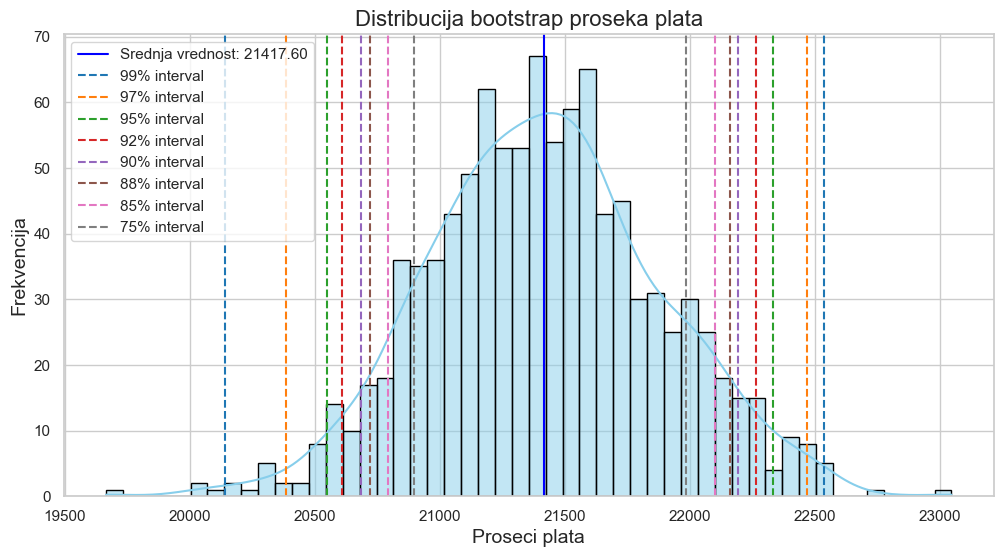

Bootstrap | n=319 | N=3199 | bootstrap uzoraka=1000


In [27]:
bs.plotDist()
print(bs)

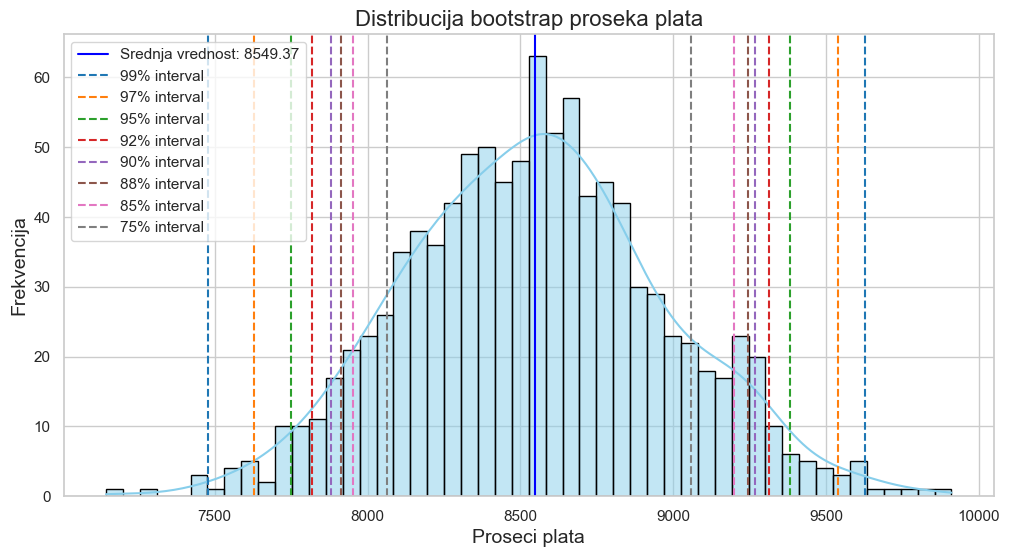

Bootstrap | n=319 | N=3199 | bootstrap uzoraka=1000


In [28]:
bs.plotDist(x = np.sqrt(bs.varijanseUzoraka))
print(bs)

In [29]:
obim = bs.obimUzorka()
obim

,n,d
99%,306,"1.198,43"
97%,307,"1.040,40"
95%,318,"892,58"
92%,307,"826,74"
90%,315,"752,72"
88%,308,"720,55"
85%,319,"654,01"
75%,297,"543,42"


In [30]:
bs = Bootstrap(df)
opt = obim.loc[obim['n'].idxmax()]
bs.n = np.int_(opt['n'])
print(f' n: {bs.n}\n d:{opt['d']}\n nivo pouzdanosti: {obim['n'].idxmax()}')
bs.fit(1000)
print(f' JB statistika {bs.jbTest.loc['hi^2']}')
bs

 n: 319
 d:654.0072492163017
 nivo pouzdanosti: 85%
 JB statistika 0.6625633712672383


Bootstrap | n=319 | N=3199 | bootstrap uzoraka=1000

In [59]:
for var in ['satiRada', 'obrazovanje', 'starost']:
    print(f'Korelacija {var} i plate \n {form(df[var].corr(df.plata))}')

Korelacija satiRada i plate 
 0,19
Korelacija obrazovanje i plate 
 0,41
Korelacija starost i plate 
 0,12


In [27]:
class ONK:
    '''
    Klasa za regresionu analizu metodom običnih najmanjih kvadrata (ONK).
    
    Parametri:
    ----------
    alfa : float ili list, opciono
        Rizik greške (nivo značajnosti) za statističko testiranje koeficijenata.
        Podrazumevano: [0.1, 0.05, 0.01].

    Atributi:
    ----------
    x : pd.DataFrame
        Matrica nezavisnih promenljivih.
    y : pd.Series
        Zavisna promenljiva.
    b : pd.Series
        Regresioni koeficijenti.
    bstd : pd.Series
        Standardne greške koeficijenata.
    tstat : pd.Series
        T-vrednosti za koeficijente.
        '''
    def __init__ (self, alfa = None):
        '''
        Inicijalizacija ONK modela sa zadatim nivoima značajnosti.
        
        '''
        default = [0.1, 0.05, 0.01]
        if alfa is None:
            self.alfa = default
        elif isinstance(alfa, (float, int)):
            if alfa < 0 or alfa > 1:
                raise ValueError('Alfa mora biti izmedju 1 i 0')
            self.alfa = sorted(set(default + [alfa]))
        else:
            for a in alfa:
                if a < 0 or a > 1:
                    raise ValueError('Alfa mora biti izmedju 1 i 0')
            self.alfa = sorted(set(default + list(alfa)))
        for attr in ['x', 'y', 'm', 'n', 'b', 'bstd', 'tstat']:
            setattr(self, attr, None)
        

    def fit(self,x ,y, konstanta = True, kategorije = None):
        '''
        Trenira regresioni model metodom običnih najmanjih kvadrata.

        Parametri:
        ----------
        x : pd.DataFrame
            Matrica nezavisnih promenljivih.
        y : pd.Series
            Zavisna promenljiva.
        konstanta : bool
            Da li uključiti slobodni član ('const').
        kategorije : list[str], opciono
            Kategorijske promenljive za kreiranje dummy varijabli.

        Rezultat:
        ----------
        pd.DataFrame
            Tabela sa koeficijentima, standardnim greškama i t-statistikama.
        '''
        self.x = x.copy()
        self.y = y.copy()
        self.m = self.x.shape[0]
        self.n = self.x.shape[1]
        self.t = {a : abs(stats.t.ppf( a / 2, self.m - self.n)) for a in self.alfa}


        if any(kat in self.x.columns for kat in ['region', 'zene', 'urban', 'obr3']):
            self.vestacke(kategorije)
            self.x = self.x.astype(float)
        
        if konstanta and 'const' not in self.x.columns:
            self.x.insert(0,'const',1)
        
        self.n = self.x.shape[1]

    
        self.b = pd.Series(np.linalg.inv(self.x.T @ self.x) @ (self.x.T @ self.y), index = self.x.columns)
        ykappa = self.x @ self.b
        res = self.y - ykappa
        sigma2 = res.T @ res / (self.m - self.n)
        self.bstd = pd.Series(np.sqrt(np.diag(np.linalg.inv(self.x.T @ self.x) * sigma2)),index = self.x.columns)
        self.tstat = pd.Series(self.b / self.bstd, index = self.x.columns)
   
    
        sig = self.tstat.apply(lambda t:  "*" * sum(abs(t) >= self.t[a] for a in [.1, .05, .01]) if abs(t) > self.t[0.1] else '')
 
        model = pd.concat([self.b,self.bstd,self.tstat, sig],axis = 1)
        model.columns = ['koeficijent', 'std', 't', 'sig']
        return model

    def fitsig(self, alfa = 0.1):
        '''
        Iterativno uklanja statistički nebitne promenljive po zadatom alfa.

        Parametri:
        ----------
        alfa : float
            Nivo značajnosti za eliminaciju promenljivih.

        Rezultat:
        ----------
        pd.DataFrame
            Rezultujući model sa značajnim promenljivima.
        '''
        self.fit(self.x, self.y)
        maska = (~self.b.index.str.contains('region')) & (~self.b.index.str.contains('const'))
        
        for i in range(len(self.b[maska])):
            if abs(self.tstat[maska].iloc[i]) < self.t[alfa]:
                print(f'Promenjiva {self.b[maska].index[i]} je statisticki neznacajna, t vrednost:\n{self.tstat[maska].iloc[i]}')
                self.x = self.x.drop(self.b[maska].index[i], axis = 1)
                self.n = self.x.shape[1]
                maska = (~self.b.index.str.contains('region')) & (~self.b.index.str.contains('const'))
                return self.fitsig(alfa)
        if (abs(self.b[~maska].drop('const') / self.bstd[~maska].drop('const')) < self.t[alfa]).all():
            self.x = self.x.drop(self.x.columns[self.x.columns.str.startswith('region')], axis = 1)
            self.n = self.x.shape[1]
            self.b = self.b[~self.b.index.str.startswith('region')]
            print(f'Regioni su statisticki neznacajni t statistike :\n {self.tstat[~maska].drop('const')}')

        return self.fit(self.x, self.y)
        
    @property
    def matOblik (self):
        '''
        Prikazuje regresionu jednačinu kao tekst.
        '''
        koeficijenti = []
        for var,koef in self.b.items():
            if var.lower() == 'const':
                koeficijenti.append(f'{form(koef)}')
            else:
                koeficijenti.append(f'{form(koef)} *{var}')
        jednacina = f"{self.y.name} = " + " + ".join(koeficijenti)
        return jednacina

    def predict(self, x = None, mean = False, total = False):
        '''
        Predviđa vrednosti zavisne promenljive.

        Parametri:
        ----------
        vektor : pd.DataFrame
            Matrica novih podataka za predikciju.
        mean : bool
            Da li vratiti srednju vrednost predikcija.
        total : bool
            Da li vratiti sumu predikcija.

        Rezultat:
        ----------
        float ili pd.Series
            Predikcije zavisne promenljive.
        '''
        x = self.x if x is None else x
        predikcija = x @ self.b
        if mean:
            return predikcija.mean()
        elif total:
            return predikcija.sum()
        else:
            return predikcija

    def vestacke(self, kategorije , x = None):
        '''
        Kreira vestacke promenljive za kategorijske podatke.
        '''
        x = self.x if x is None else x.copy()
        if 'const' not in x.columns:
            x.insert(0,'const',1)            
        for kat in kategorije:
            for red in sorted(x[kat].unique())[1:]:
                x[f'{kat}_{red}'] =  (x[kat] == red).astype(float)
            x.drop(kat, axis = 1, inplace = True)
            self.x = x
        return self.x

    def R2(self, x, y):
            SSR = ((y - self.predict(x)) ** 2).sum()
            SSY = ((y - y.mean()) ** 2).sum()
            return 1 - SSR / SSY

    @property
    def pregled(self):
        """
        Kratki pregled modela sa ključnim statističkim merama.
        """
        ypred = self.predict(self.x)
        res = self.y - ypred
    
        R2 = self.R2(self.x, self.y)
        MSE = (res ** 2).mean()
        RMSE = np.sqrt(MSE)
        MAE = res.abs().mean()
    
        data = pd.DataFrame([self.m, self.n - 1, form(R2),form(MSE),form(RMSE), form(MAE)],
                            index= ["Broj posmatranja", "Broj prediktora", "R²", "MSE", "RMSE", "MAE"],
                           columns= ['Vrednosti'])

    
        return data

In [28]:
y = df['plata']
x = df.drop(['plata', 'obr3', 'satnica'], axis = 1)

In [29]:
model = ONK()

In [30]:
model = ONK(alfa = [0.5, 0.025, 0.125, 0.075])
model.fit(x, y, kategorije= ['region', 'zene','urban'])

,koeficijent,std,t,sig
const,"-6.783,31","1.302,03","-5,21",***
starost,"115,92","12,57","9,22",***
satiRada,"235,49","19,17","12,28",***
obrazovanje,"1.440,64","56,85","25,34",***
region_Juzna i Jugoistocna Srbija,"-3.406,77","402,04","-8,47",***
region_Sumadija i Zapadna Srbija,"-3.109,46","377,06","-8,25",***
region_Vojvodina,"-2.214,81","398,04","-5,56",***
zene_Zena,"-2.172,96","271,56","-8,00",***
urban_Selo,"-1.249,44","278,73","-4,48",***


In [31]:
model.fitsig(alfa= 0.05)

,koeficijent,std,t,sig
const,"-6.783,31","1.302,03","-5,21",***
starost,"115,92","12,57","9,22",***
satiRada,"235,49","19,17","12,28",***
obrazovanje,"1.440,64","56,85","25,34",***
region_Juzna i Jugoistocna Srbija,"-3.406,77","402,04","-8,47",***
region_Sumadija i Zapadna Srbija,"-3.109,46","377,06","-8,25",***
region_Vojvodina,"-2.214,81","398,04","-5,56",***
zene_Zena,"-2.172,96","271,56","-8,00",***
urban_Selo,"-1.249,44","278,73","-4,48",***


In [32]:
model.matOblik

'plata = -6.783,31 + 115,92 *starost + 235,49 *satiRada + 1.440,64 *obrazovanje + -3.406,77 *region_Juzna i Jugoistocna Srbija + -3.109,46 *region_Sumadija i Zapadna Srbija + -2.214,81 *region_Vojvodina + -2.172,96 *zene_Zena + -1.249,44 *urban_Selo'

In [33]:
model.pregled

,Vrednosti
Broj posmatranja,3199
Broj prediktora,8
R²,"0,27"
MSE,"53.940.905,17"
RMSE,"7.344,45"
MAE,"5.755,64"


In [34]:
np.random.seed(42)
train = np.random.choice(len(df), int(len(df) * .8), replace = False)
test = list(set(range(len(df))) - set(train))

len(test), len(train), len(df)

(640, 2559, 3199)

In [35]:
model = ONK([.5, 0.025, 0.125, 0.075])
model.fit(x.iloc[train], y.iloc[train], kategorije= ['region', 'zene','urban'])

,koeficijent,std,t,sig
const,"-6.019,84","1.430,81","-4,21",***
starost,"114,18","13,84","8,25",***
satiRada,"222,45","21,29","10,45",***
obrazovanje,"1.416,77","62,03","22,84",***
region_Juzna i Jugoistocna Srbija,"-3.320,15","441,94","-7,51",***
region_Sumadija i Zapadna Srbija,"-3.153,31","412,76","-7,64",***
region_Vojvodina,"-2.057,29","439,56","-4,68",***
zene_Zena,"-2.247,33","299,66","-7,50",***
urban_Selo,"-1.235,72","305,94","-4,04",***


In [36]:
model.fitsig(alfa= 0.05)

,koeficijent,std,t,sig
const,"-6.019,84","1.430,81","-4,21",***
starost,"114,18","13,84","8,25",***
satiRada,"222,45","21,29","10,45",***
obrazovanje,"1.416,77","62,03","22,84",***
region_Juzna i Jugoistocna Srbija,"-3.320,15","441,94","-7,51",***
region_Sumadija i Zapadna Srbija,"-3.153,31","412,76","-7,64",***
region_Vojvodina,"-2.057,29","439,56","-4,68",***
zene_Zena,"-2.247,33","299,66","-7,50",***
urban_Selo,"-1.235,72","305,94","-4,04",***


In [37]:
model.pregled

,Vrednosti
Broj posmatranja,2559
Broj prediktora,8
R²,"0,27"
MSE,"52.481.598,00"
RMSE,"7.244,42"
MAE,"5.678,05"


In [39]:
model.vestacke(x = x.iloc[test], kategorije= ['region', 'zene','urban'])

,const,starost,satiRada,obrazovanje,region_Juzna i Jugoistocna Srbija,region_Sumadija i Zapadna Srbija,region_Vojvodina,zene_Zena,urban_Selo
2,1,24,42,8,"0,00","1,00","0,00","0,00","0,00"
2434,1,24,40,12,"1,00","0,00","0,00","0,00","1,00"
5,1,49,42,16,"0,00","1,00","0,00","0,00","0,00"
2445,1,38,35,12,"1,00","0,00","0,00","1,00","0,00"
15,1,52,40,11,"1,00","0,00","0,00","0,00","0,00"
...,...,...,...,...,...,...,...,...,...
2376,1,33,40,12,"0,00","1,00","0,00","0,00","0,00"
2398,1,55,35,8,"0,00","1,00","0,00","1,00","1,00"
2418,1,43,48,8,"0,00","1,00","0,00","0,00","1,00"
2421,1,52,56,8,"0,00","1,00","0,00","0,00","1,00"


In [40]:
model.y = y.iloc[test]
model.pregled

,Vrednosti
Broj posmatranja,2559
Broj prediktora,8
R²,"0,26"
MSE,"59.965.279,45"
RMSE,"7.743,73"
MAE,"5.980,22"


In [63]:
Ytotal = df['plata'].sum()
Ybar = df['plata'].mean()
print(f'Total plate je {form(Ytotal)}, a prosek je {form(Ybar)}')
df = df.drop('satnica',axis =1 )

Total plate je 68.524.376,00, a prosek je 21.420,56


`PSU`

In [78]:
class PSU:
    '''
    Klasa za ocenjivanje sredine i totala populacije Prostim Slucajnim Uzorkom:
    - količničko ocenjivanje,
    - regresiono ocenjivanje (koristeći ONK model).
    
    Parametri
    ----------
    df : pd.DataFrame
        Kompletnan skup podataka (populacija).
    X : pd.DataFrame
        Matrica objašnjavajućih promenljivih za celu populaciju.
    Y : pd.Series
        Zavisna promenljiva (npr. 'plata') za celu populaciju.
    n : int
        Veličina slučajnog uzorka.
    kategorije : list[str], opciono
        Kategorijske promenljive za kreiranje dummy promenljivih.
    alfa : float ili list, opciono
        Nivo značajnosti za statističko testiranje parametara.
    seed : int, opciono
        Seed za reprodukciju slučajnog uzorka.
    
    Atributi
    ----------
    df : pd.DataFrame
        Kompletan skup podataka.
    uzorak : pd.DataFrame
        Nasumično izabrani uzorak podataka.
    X, x : pd.DataFrame
        Matrice objašnjavajućih promenljivih za populaciju i uzorak.
    Y, y : pd.Series
        Zavisne promenljive za populaciju i uzorak.
    Ym, ym : float
        Srednje vrednosti zavisne promenljive u populaciji i uzorku.
    '''
        
    def __init__(self, df, X, Y, n, kategorije = None, alfa= [0.1, 0.05, 0.01], seed=1304):
        self.df = df.copy()
        self.n = n
        self.N = len(df)
        self.f = n / self.N
        self.seed = seed
        self.alfa = alfa
        self.uzorak = df.sample(n=n, replace=False, random_state=seed)

        self.model = ONK(alfa)
        if kategorije is not None:
            self.X = self.model.vestacke(kategorije= kategorije, x = X)
            self.x = self.model.vestacke(kategorije= kategorije, x = X.loc[list(self.uzorak.index)])
        else:
            self.X = X
            self.x = X.loc[self.uzorak.index]
        
        self.Y = self.df['plata']
        self.y = self.uzorak['plata']
        self.Ym = self.Y.mean()
        self.Xm = self.X.mean()
        self.ym = self.y.mean()
        self.xm = self.x.mean()

        self.bs = None


    def describe(self):
        '''
        Prikazuje opisne statistike za populaciju i uzorak, 
        uključujući totale mesečnih zarada i godina obrazovanja.
        '''
        print('--- OPIS PODATAKA ---\n')
    
        print('Uzorak:')
        display(self.uzorak.describe())
    
        print('\nPopulacija:')
        display(self.df.describe())
    
        rezultati = pd.DataFrame({
            'Total mesečne zarade': [form(self.Y.sum()), form(self.y.sum() / self.f)],
            'Total godina obrazovanja': [form(self.X['obrazovanje'].sum()), form(self.x['obrazovanje'].sum() / self.f)]
        }, index=['Populacija', 'Uzorak (korigovan)'])
    
        print('\n--- TOTALI OBELEŽJA ---\n')
        display(rezultati)

    
    def kolicnickoOcenjivanje(self, var='obrazovanje'):
        '''
        Količničko ocenjivanje sredine i totala Y, 
        sa pristrasnošću i intervalima poverenja.

        Parametri:
        ----------
        var : str
            Promenljiva za količničko ocenjivanje.
        '''
        x = self.x[var]
        X = self.X[var]

        R = self.Y.sum() / X.sum()
        Ru = self.y.sum() / x.sum()

        YbarKapa = Ru * X.mean()
        YtotalKapa = Ru * X.sum()
        pristrastnostR = YbarKapa - self.Y.mean()
        rel_pristrastnost = (pristrastnostR / self.Y.mean()) * 100

        rezultati = pd.DataFrame({'Vrednost': [form(R), form(Ru), form(YbarKapa), form(self.Y.mean()), form(pristrastnostR),
                                               f'{rel_pristrastnost:.2f}%', form(YtotalKapa), form(self.Y.sum())]},
                                 index=['Količnik populacije (R)', 'Količnik uzorka (Ru)', 'Sredina Y količnički', 'Stvarna sredina Y',
                                        'Pristrasnost sredine', 'Relativna pristrasnost (%)', 'Total Y količnički', 'Stvarni total Y'])

        print('\n--- KOLIČNIČKO OCENJIVANJE ---\n')
        display(rezultati)

        s = np.square(self.Y - X * R).sum()
        SYt = np.sqrt(s * (self.N**2 * (1 - self.f)) / (self.n * (self.N - 1)))
        SYm = np.sqrt(s * (1 - self.f) / (self.n * (self.N - 1)))
        SR = np.sqrt(s * (1 - self.f) / (self.n * X.mean()**2 * (self.N - 1)))

        devijacije = pd.DataFrame({
            'Standardna devijacija': [form(SYt), form(SYm), form(SR)]
        }, index=['Totala Y', 'Sredine Y', 'Količnika'])

        print('\n--- STANDARDNE DEVIJACIJE ---')
        display(devijacije)

        self.intervaliPoverenja(YbarKapa, SYm)

        self.SKGR = pristrastnostR**2 + SYm**2

    def regresionoOcenjivanje(self, alfa=0.1):
        '''
        Regresiono ocenjivanje sredine i totala korišćenjem ONK modela.
    
        Parametri:
        ----------
        alfa : float
            Nivo značajnosti za eliminaciju promenljivih.
        '''
        print('\n--- REGRESIONO OCENJIVANJE ---')
    
        self.model.fit(self.X, self.Y)
        self.X = self.model.x
        rezultat = self.model.fit(self.x, self.y)
    
        print('\nMetodom običnih najmanjih kvadrata ocenjen je model:')
        display(rezultat)
    
        print('\nZnačajni parametri nakon iterativne eliminacije:')
        znacajni_rezultat = self.model.fitsig(alfa)
        display(znacajni_rezultat)
        self.x = self.model.x
        self.X = self.X.loc[:, list(self.x.columns)]
    
        print('\nJednačina modela:')
        print(self.model.matOblik)
    
        xm = self.x.mean()
        Xm = self.X.mean()
    
        ybarlr = self.ym + (Xm - xm) @ self.model.b
        pristrasnostLr = ybarlr - self.Ym
    
        rho = self.x.loc[:, self.x.std() > 0].apply(lambda col: col.corr(self.y))
        sy = sum(np.square(self.y - self.Ym)) / (self.n - 1)
        Sylrs = np.sqrt((1 - rho**2) * sy * ((1 - self.f) / self.n))
    
        ybarlr2 = self.model.predict(self.x, mean=True)
    
        rezultati_sredina = pd.DataFrame({
            'Vrednost': [
                form(ybarlr),
                form(Sylrs.mean()),
                form(pristrasnostLr),
                form(ybarlr2)
            ]
        }, index=[
            'Regresiona ocena sredine (poznat Xm)',
            'Standardna devijacija regresione ocene',
            'Pristrasnost regresione ocene',
            'Regresiona ocena sredine (uzorak)'
        ])
    
        print('\n--- OCENE SREDINE ---')
        display(rezultati_sredina)
    
        self.intervaliPoverenja(ybarlr, Sylrs.mean())
    
        Ytotallr1 = self.model.predict(self.X, total=True)
        Ytotallr2 = self.model.predict(self.x, total=True) * self.N / self.n
    
        rezultati_total = pd.DataFrame({
            'Vrednost': [form(Ytotallr1), form(Ytotallr2), form(self.Y.sum())]
        }, index=[
            'Regresiona ocena totala (populacija)',
            'Regresiona ocena totala (proširen uzorak)',
            'Stvarni total'
        ])
    
        print('\n--- OCENE TOTALA ---')
        display(rezultati_total)
    
        self.SKGLr = pristrasnostLr**2 + Sylrs.mean()**2
    
        rezultati_skg = pd.DataFrame({
            'Vrednost': [form(self.SKGR), form(self.SKGLr)]
        }, index=[
            'SKG količničkog ocenjivanja',
            'SKG regresionog ocenjivanja'
        ])
    
        print('\n--- SREDNJE KVADRATNE GREŠKE ---')
        display(rezultati_skg)

    def intervaliPoverenja(self, ocena, stdev, parametar = None):
        """
        Formira DataFrame sa intervalima poverenja za datu ocenu.
    
        Parametri:
        ----------
        ocena : float
            Procena sredine ili totala.
        stderr : float
            Standardna greška procene.
        naziv : str
            Naziv procene (radi ispisa).
        """
        parametar = self.Ym if parametar is None else parametar
        intervali = []
        for a in self.alfa:
            t = stats.t.ppf(1 - a / 2, self.n - 1)
            donja = ocena - t * stdev
            gornja = ocena + t * stdev
            raspon = gornja - donja
            if parametar is not None:
                sadrzi = 'DA' if donja <= parametar <= gornja else 'NE'
                intervali.append([ocena, stdev, f'{(1 - a)*100:.1f}%', form(donja), form(gornja), form(raspon), sadrzi])
            else:
                intervali.append([ocena,stdev, f'{(1 - a)*100:.1f}%', form(donja), form(gornja), form(raspon)])

        kolone = ['Ocena', 'Standardna devijacija','Interval', 'Donja granica', 'Gornja granica', 'Raspon']
        if parametar is not None:
            kolone.append('Sadrži pravu vrednost')
    
        df_intervali = pd.DataFrame(intervali, columns=kolone).set_index('Interval')
        print(f'\n--- INTERVALI POVERENJA ---')
        display(df_intervali)
        return df_intervali

    def plot(self, k=1000):
        """
        Vizualizuje distribuciju bootstrap proseka plata iz uzorka,
        koristeći plotDist iz klase Bootstrap.
        
        Parametri:
        ----------
        k : int
            Broj bootstrap uzoraka. Podrazumevano: 1000
        """
        if self.bs is None:
            self.bs = Bootstrap(self.df, alfa=self.alfa, n=self.n)
            self.bs.fit(k)
        self.bs.plotDist(alfa= self.alfa, target = self.y.mean())
    def minimalni_interval(self, k = None):
        """
        Vraća najmanji interval poverenja (tj. najveći nivo značajnosti α)
        u kojem target upada u bootstrap distribuciju.
        """
        target_mean = self.y.mean()
        alfe = np.linspace(0.001, 0.5, 500)[::-1]
        k = 3000 if k is None else k
        if self.bs is None:
            self.bs = Bootstrap(self.df, alfa=self.alfa, n=self.n)
            self.bs.fit(k)
        for a in alfe:
            
            interval = self.bs.interval(alfa=a).iloc[0]
            donja, gornja = interval['donja'], interval['gornja']
            if donja <= target_mean <= gornja:
                if a not in self.alfa:
                    self.alfa.append(a)
                    self.alfa = sorted(self.alfa)
                return 1 - a

        return None

In [79]:
bole = PSU(df, X = df.drop(['plata', 'obr3'], axis =1 ),Y = df['plata'], kategorije = ['region', 'urban', 'zene'], n = 400)

In [80]:
bole.minimalni_interval(k = 5000)

np.float64(0.69)

In [82]:
bole.alfa

[0.01, 0.05, 0.1, np.float64(0.31)]

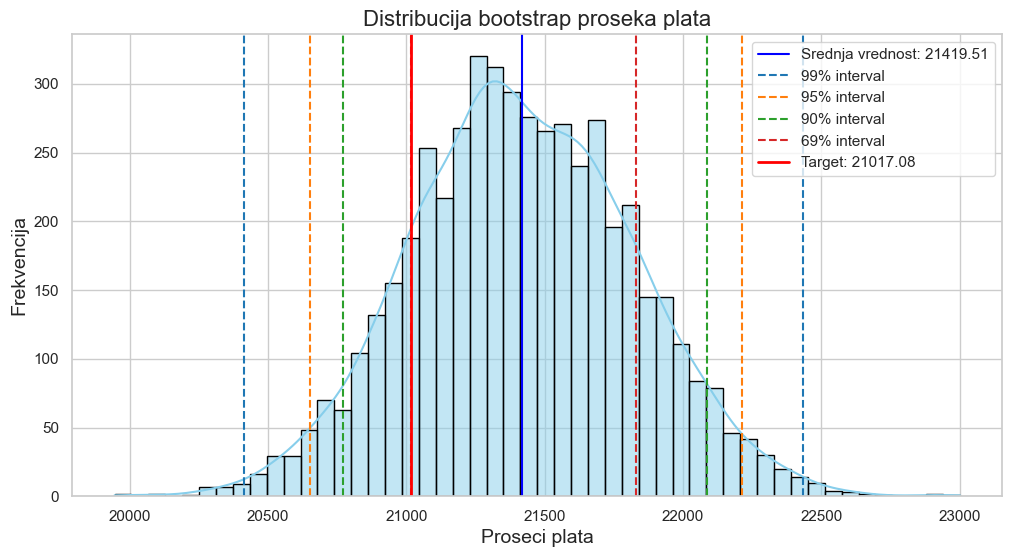

In [83]:
bole.plot()

In [47]:
bole.describe()

--- OPIS PODATAKA ---

Uzorak:


,starost,satiRada,plata,obrazovanje
count,"400,00","400,00","400,00","400,00"
mean,"41,64","42,78","21.017,08","11,63"
std,"9,90","6,03","8.392,17","2,53"
min,"17,00","25,00","8.000,00","0,00"
25%,"34,00","40,00","15.000,00","11,00"
50%,"43,00","40,00","20.000,00","12,00"
75%,"49,25","48,00","25.000,00","12,00"
max,"62,00","65,00","60.000,00","18,00"



Populacija:


,starost,satiRada,plata,obrazovanje
count,"3.199,00","3.199,00","3.199,00","3.199,00"
mean,"40,52","43,48","21.420,56","11,80"
std,"10,37","6,89","8.570,89","2,38"
min,"16,00","25,00","6.000,00","0,00"
25%,"32,00","40,00","15.000,00","11,00"
50%,"41,00","40,00","20.000,00","12,00"
75%,"49,00","48,00","25.500,00","12,00"
max,"64,00","65,00","65.000,00","20,00"



--- TOTALI OBELEŽJA ---



,Total mesečne zarade,Total godina obrazovanja
Populacija,"68.524.376,00","37.736,00"
Uzorak (korigovan),"67.233.630,92","37.196,37"


In [48]:
bole.kolicnickoOcenjivanje()


--- KOLIČNIČKO OCENJIVANJE ---



,Vrednost
Količnik populacije (R),"1.815,89"
Količnik uzorka (Ru),"1.807,53"
Sredina Y količnički,"21.321,98"
Stvarna sredina Y,"21.420,56"
Pristrasnost sredine,"-98,58"
Relativna pristrasnost (%),-0.46%
Total Y količnički,"68.209.024,86"
Stvarni total Y,"68.524.376,00"



--- STANDARDNE DEVIJACIJE ---


,Standardna devijacija
Totala Y,"1.178.831,11"
Sredine Y,"368,50"
Količnika,"31,24"



--- INTERVALI POVERENJA ---


,Ocena,Standardna devijacija,Donja granica,Gornja granica,Raspon,Sadrži pravu vrednost
Interval,,,,,,
99.0%,"21.321,98","368,50","20.368,23","22.275,74","1.907,51",DA
95.0%,"21.321,98","368,50","20.597,54","22.046,43","1.448,89",DA
90.0%,"21.321,98","368,50","20.714,44","21.929,52","1.215,08",DA
70.6%,"21.321,98","368,50","20.934,77","21.709,19","774,42",DA


In [49]:
bole.regresionoOcenjivanje()


--- REGRESIONO OCENJIVANJE ---

Metodom običnih najmanjih kvadrata ocenjen je model:


,koeficijent,std,t,sig
const,"-7.540,50","3.800,82","-1,98",**
starost,"130,81","36,83","3,55",***
satiRada,"261,05","60,94","4,28",***
obrazovanje,"1.318,43","148,71","8,87",***
region_Juzna i Jugoistocna Srbija,"-4.299,11","1.176,00","-3,66",***
region_Sumadija i Zapadna Srbija,"-1.951,76","1.086,82","-1,80",*
region_Vojvodina,"-2.313,91","1.148,68","-2,01",**
urban_Selo,"-1.133,64","788,55","-1,44",
zene_Zena,"-1.846,77","765,70","-2,41",**



Značajni parametri nakon iterativne eliminacije:
Promenjiva urban_Selo je statisticki neznacajna, t vrednost:
-1.4376230436288424


,koeficijent,std,t,sig
const,"-7.811,77","3.801,30","-2,06",**
starost,"128,76","36,86","3,49",***
satiRada,"256,40","60,94","4,21",***
obrazovanje,"1.343,82","147,86","9,09",***
region_Juzna i Jugoistocna Srbija,"-4.571,88","1.162,17","-3,93",***
region_Sumadija i Zapadna Srbija,"-2.303,87","1.060,30","-2,17",**
region_Vojvodina,"-2.588,58","1.134,22","-2,28",**
zene_Zena,"-1.686,74","758,59","-2,22",**



Jednačina modela:
plata = -7.811,77 + 128,76 *starost + 256,40 *satiRada + 1.343,82 *obrazovanje + -4.571,88 *region_Juzna i Jugoistocna Srbija + -2.303,87 *region_Sumadija i Zapadna Srbija + -2.588,58 *region_Vojvodina + -1.686,74 *zene_Zena

--- OCENE SREDINE ---


,Vrednost
Regresiona ocena sredine (poznat Xm),"21.264,45"
Standardna devijacija regresione ocene,"385,67"
Pristrasnost regresione ocene,"-156,11"
Regresiona ocena sredine (uzorak),"21.017,08"



--- INTERVALI POVERENJA ---


,Ocena,Standardna devijacija,Donja granica,Gornja granica,Raspon,Sadrži pravu vrednost
Interval,,,,,,
99.0%,"21.264,45","385,67","20.266,25","22.262,66","1.996,40",DA
95.0%,"21.264,45","385,67","20.506,25","22.022,66","1.516,41",DA
90.0%,"21.264,45","385,67","20.628,60","21.900,31","1.271,70",DA
70.6%,"21.264,45","385,67","20.859,20","21.669,71","810,51",DA



--- OCENE TOTALA ---


,Vrednost
Regresiona ocena totala (populacija),"68.024.989,76"
Regresiona ocena totala (proširen uzorak),"67.233.630,92"
Stvarni total,"68.524.376,00"



--- SREDNJE KVADRATNE GREŠKE ---


,Vrednost
SKG količničkog ocenjivanja,"145.509,79"
SKG regresionog ocenjivanja,"173.113,27"


In [50]:
def strat(n, x, y='', z='', seed=1304):
    if z != '':
        df['Strata'] = df[x].astype(str) + '_' + df[y].astype(str) + '_' + df[z].astype(str)
    elif y != '':
        df['Strata'] = df[x].astype(str) + '_' + df[y].astype(str)
    else:
        df['Strata'] = df[x].astype(str)
        
    strata_counts = df['Strata'].value_counts(normalize=True)
    nh = (strata_counts * n).round().astype(int)
    print(nh, '\n\n')

    uzorak = None
    for strata, count in nh.items():
        stratGrupa = df[df['Strata'] == strata]  
        stratUzorak = stratGrupa.sample(n=count, random_state=seed)  
        uzorak = pd.concat([uzorak, stratUzorak], axis=0)  
        
    uzorak = uzorak.reset_index(drop=True)
    x = uzorak['obrazovanje']
    y = uzorak['plata']
    X = df['obrazovanje']
    Xtotal = X.sum()
    Y = df['plata']
    Ym = Y.mean()
    Ytotal = Y.sum() 
    print('Uzorak', uzorak.Strata.value_counts(normalize=True), '\nDf', df.Strata.value_counts(normalize=True), sep='\n')
    print('\n\nUzorak', uzorak.describe(), '\nDf', df.describe(), '\n', sep='\n')
    N = df.shape[0]
    n = uzorak.shape[0]
    f = n / N
    nh = uzorak['Strata'].value_counts()
    Nh = df['Strata'].value_counts()
    ybarh = uzorak.groupby('Strata')['plata'].mean()
    Wh = Nh / N
    ybarSt = Nh.dot(ybarh) / N
    S2h = uzorak.groupby('Strata')['plata'].var()
    VybarSt = ((1 - f) / N) * Wh.dot(S2h)
    SybarSt = np.sqrt(VybarSt)
    alfa = 0.05
    t = stats.t.ppf(1 - alfa / 2, n - 1)
    Ybar95St = (round(ybarSt - t * SybarSt, 2), round(ybarSt + t * SybarSt, 2))
    
    print(f'Ocena prosečne plate stratifikovanim slucajnim uzorkom je : {form(ybarSt)}', f'Pristrasnost {form(ybarSt - Ym)}', sep='\n')
    print(f'Standardna devijacija ocene sredine stratifikovanim slucajnim uzorkom je {form(SybarSt)}?')
    print(f'95% interval ocene sredine stratifikovanim slucajnim uzorkom je {Ybar95St}') 
    
    YtotalSt = N * ybarSt
    SYtotalSt = N * SybarSt
    Ytotal95St = (round(YtotalSt - t * SYtotalSt,2), round(YtotalSt + t * SYtotalSt,2))
    
    print(f'Ocena totala obeležja populacije (ukupna plata) stratifikovanim slucajnim uzorkom je : {form(YtotalSt)}', f'Pristrasnost {form(YtotalSt - Ytotal)}', sep='\n')
    print(f'Standardna devijacija ocene totala stratifikovanim slucajnim uzorkom je {form(SYtotalSt)}')
    print(f'95% interval ocene sredine stratifikovanim slucajnim uzorkom je {Ytotal95St}')
    print('\n\nKolicnicko ocenjivanje kod stratifikovanog uzorka'.upper())
    
    Yh = df.groupby('Strata')['plata'].sum()
    Xh = df.groupby('Strata')['obrazovanje'].sum()
    fh = nh / Nh
    Rh = Yh / Xh
    rho = uzorak.groupby('Strata')['obrazovanje'].corr(y)
    
    print('korelacija godina obrazovanja sa zaradom po stratumima'.upper(), rho, sep='\n')
    
    yh = uzorak.groupby('Strata')['plata'].sum()
    xh = uzorak.groupby('Strata')['obrazovanje'].sum()
    Xh = df.groupby('Strata')['obrazovanje'].sum()
    Sx2h = uzorak.groupby('Strata')['obrazovanje'].var()
    YtotalRs = (yh / xh).dot(Xh)
    SYtotalRs = np.sqrt((((np.square(Nh) * (1 - f))) / nh).dot((S2h + np.square(Rh) * Sx2h - (2 * Rh * rho.values * np.sqrt(S2h) * np.sqrt(Sx2h)))))
    Ytotal90Rs = (round(YtotalRs - t * SYtotalRs), round(YtotalRs + t * SYtotalRs))
    SYbarRs = SYtotalRs / N
    YbarRs = YtotalRs / N
    Ybar95Rs = (round(YbarRs - t * SYbarRs), round(YbarRs + t * SYtotalRs))
    
    print('Posebna količnička ocena prosecne mesecne zarade je:\n', form(YbarRs), '\nPristrasnost', form(YbarRs - Ym))
    print('Standardna devijacija posebne količničke ocene sredine stratifikovanim slucajnim uzorkom je', form(SYbarRs))
    print('95% interval ocene totala posebnom kolicnickom ocenom je', Ybar95Rs)
    print(f'Posebna kolicnicka ocena totala populacije {form(YtotalRs)}', f'Pristrasnost {form(YtotalRs - Ytotal)}', sep='\n')
    print(f'Standardna devijacija ocene totala stratifikovanim slucajnim uzorkom je {form(SYtotalRs)}')
    print('\nKombinovana kolicnicka ocena'.upper())
    
    xbarh = uzorak.groupby('Strata')['obrazovanje'].mean()
    xbarSt = Nh.dot(xbarh) / N
    YtotalRc = ybarSt / xbarSt * Xtotal
    YbarRc = YtotalRc / N
    
    print(f'Kombinovana kolicnicka ocena sredine populacije je {form(YbarRc)}', f'Pristrasnost {form(YbarRc - Ym)}', sep='\n')
    print(f'Kombinovana kolicnicka ocena totala populacije je {form(YtotalRc)}', f'Pristrasnost {form(YtotalRc - Ytotal)}', sep='\n')
    
    print('\n\nRegresiono ocenjivanje'.upper())    
    uzorak.insert(0,'const',1)
    x = uzorak[['const', 'obrazovanje', 'Strata']]
    y = uzorak[['plata', 'Strata']]
    X = df[['obrazovanje', 'Strata']]
    Y = df[['plata', 'Strata']]
    b = pd.DataFrame()
    for ime, grupa in uzorak.groupby('Strata'):
        y = grupa['plata']
        x = grupa[['const', 'obrazovanje']]
        model = ONK(x, y)
        model.fit()
        b[ime] = model.b
    b = b.T
    print(b)
    Xbarh = df.groupby('Strata')['obrazovanje'].mean()
    Wh = Nh / N
    ybarlrh = ybarh + b.iloc[:, 1] * (Xbarh - xbarh)
    print('Ocene mesečne zarade po stratumima', (round(ybarlrh, 2)))
    print('Pristrasnost po stratumima', (round(ybarlrh, 2) - round(df.groupby('Strata')['plata'].mean(), 2)))
    ybarlrs = Wh.dot(ybarlrh)
    Sybarlrs = np.sqrt(((np.square(Wh) * (1 - fh)) / nh).dot(S2h * (1 - np.square(rho))))
    Ybar90lrs = (ybarlrs - t * Sybarlrs, ybarlrs + t * Sybarlrs)
    print(f'Ocena sredine obeležja populacije (prosečna plata) stratifikovanim slucajnim uzorkom je : {form(ybarlrs)}', f'Pristrasnost {form(ybarlrs - Ym)}', sep='\n')
    print(f'Standardna devijacija ocene sredine stratifikovanim slucajnim uzorkom je {form(Sybarlrs)}')
    print(f'95% interval ocene sredine stratifikovanim slucajnim uzorkom je ({form(Ybar90lrs[0])}, {form(Ybar90lrs[1])})')
    SKGRs = np.square(YbarRs - Ym) + np.square(SYbarRs)
    SKGLr = np.square(ybarlrs - Ym) + np.square(Sybarlrs)
    print(f'Srednja kvadratna greska kolicnickog ocenjivanja {form(SKGRs)}\nSrednja kvadratna greska regresionog ocenjivanja {form(SKGLr)}')

In [ ]:
class SSU(PSU):
    """
    Stratifikovani Slučajni Uzorak (SSU) - podklasa PSU za rad sa stratifikacijom
    """

    def __init__(self, df, X, Y, n, stratumi, alfa=[0.1, 0.05, 0.01], seed=1304):
        super().__init__(df, X, Y, n, alfa=alfa, seed=seed)

        self.df['Strata'] = self.df[stratumi].astype(str).agg('_'.join, axis=1)
        self.stratumi = stratumi
        self.strataCounts = self.df['Strata'].value_counts(normalize=True)
        self.nh = (self.strataCounts * n).round().astype(int)
    
        self.uzorak = pd.concat([self.df[self.df['Strata'] == strata].sample(n=size, random_state=seed) 
                                 for strata, size in self.nh.items()])
        self.x = self.uzorak['obrazovanje']
        self.y = self.uzorak['plata']
        self.X = self.df['obrazovanje']
        self.Xtotal = self.X.sum()
        self.Y = self.df['plata']
        self.Ym = self.Y.mean()
        self.Ytotal = self.Y.sum() 
        self.N = self.df.shape[0]
        self.n = self.uzorak.shape[0]
        self.f = self.n / self.N
        self.nh = self.uzorak['Strata'].value_counts()
        self.Nh = self.df['Strata'].value_counts()
        self.ybarh = self.uzorak.groupby('Strata')['plata'].mean()
        self.Wh = self.Nh / self.N
        self.fh = self.nh / self.Nh
        self.S2h = self.uzorak.groupby('Strata')['plata'].var()
    def describe(self):
        print("--- Uzorak: ---")
        display(pd.DataFrame(self.nh))
        display(self.uzorak.describe())
        print("--- Populacija: ---")
        display(self.df.describe())
        ybarSt = self.Nh @ self.ybarh / self.N
        
        VybarSt = ((1 - self.f) / self.N) * self.Wh @ (self.S2h)
        SybarSt = np.sqrt(VybarSt)
        intervali = []
        self.intervaliPoverenja(ybarSt, SybarSt)

        YtotalSt = self.N * ybarSt
        SYtotalSt = self.N * SybarSt

        self.intervaliPoverenja(YtotalSt, SYtotalSt, parametar= self.Y.sum())
        
    def kolicnickoOcenjivanje(self):
        Yh = self.df.groupby('Strata')['plata'].sum()
        Xh = self.df.groupby('Strata')['obrazovanje'].sum()
        Rh = Yh / Xh
        rho = self.uzorak.groupby('Strata')['obrazovanje'].corr(self.y)
        yh = self.uzorak.groupby('Strata')['plata'].sum()
        xh = self.uzorak.groupby('Strata')['obrazovanje'].sum()
        Sx2h = self.uzorak.groupby('Strata')['obrazovanje'].var()
        YtotalRs = (yh / xh) @ (Xh)
        SYtotalRs = np.sqrt((((np.square(self.Nh) * (1 - self.f))) / self.nh) @ 
                            ((self.S2h + np.square(Rh) * Sx2h - (2 * Rh * rho.values * np.sqrt(self.S2h) * np.sqrt(Sx2h)))))
        print('\n--- KOLIČNIČKO OCENJIVANJE ---\n')

        print('korelacija godina obrazovanja sa zaradom po stratumima'.upper(), display(pd.DataFrame(rho)), sep='\n')

        self.intervaliPoverenja(YtotalRs, SYtotalRs, parametar= self.Y.sum())
        
        

        
# 
# Ytotal90Rs = (round(YtotalRs - t * SYtotalRs), round(YtotalRs + t * SYtotalRs))
# SYbarRs = SYtotalRs / N
# YbarRs = YtotalRs / N
# Ybar95Rs = (round(YbarRs - t * SYbarRs), round(YbarRs + t * SYtotalRs))

# print('Posebna količnička ocena prosecne mesecne zarade je:\n', form(YbarRs), '\nPristrasnost', form(YbarRs - Ym))
# print('Standardna devijacija posebne količničke ocene sredine stratifikovanim slucajnim uzorkom je', form(SYbarRs))
# print('95% interval ocene totala posebnom kolicnickom ocenom je', Ybar95Rs)
# print(f'Posebna kolicnicka ocena totala populacije {form(YtotalRs)}', f'Pristrasnost {form(YtotalRs - Ytotal)}', sep='\n')
# print(f'Standardna devijacija ocene totala stratifikovanim slucajnim uzorkom je {form(SYtotalRs)}')
# print('\nKombinovana kolicnicka ocena'.upper())

# xbarh = uzorak.groupby('Strata')['obrazovanje'].mean()
# xbarSt = Nh.dot(xbarh) / N
# YtotalRc = ybarSt / xbarSt * Xtotal
# YbarRc = YtotalRc / N

# print(f'Kombinovana kolicnicka ocena sredine populacije je {form(YbarRc)}', f'Pristrasnost {form(YbarRc - Ym)}', sep='\n')
# print(f'Kombinovana kolicnicka ocena totala populacije je {form(YtotalRc)}', f'Pristrasnost {form(YtotalRc - Ytotal)}', sep='\n')


In [ ]:
bole = SSU(df=df, X=df['obrazovanje'], Y=df['plata'], n=400, stratumi=['region'], seed = 42)

In [ ]:
bole.describe()

In [ ]:
bole.kolicnickoOcenjivanje()

In [ ]:
model = SSU(df=df, X=df.drop(['plata', 'obr3'], axis =1 ), Y=df['plata'],kategorije=['zene','urban','region'], n=200, stratumi=['region', 'urban'])

In [ ]:
model.describe()

In [ ]:
model.kolicnickoOcenjivanje()

In [ ]:
model.regresionoOcenjivanje()

In [ ]:
strat(n, 'region')

In [ ]:
strat(n,'zene')

In [ ]:
strat(n,'obr3')

In [ ]:
strat(1600, 'region', 'zene')

In [ ]:
strat(1600,'obr3', 'zene')

In [ ]:
strat(1600,'region','obr3')

In [ ]:
0.5*len(df)

`OCENJIVANJE PROSECNE I TOTALNE ZARADE U SRBIJI`

In [ ]:

skola = pd.read_excel(r"C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\stanovnistvoPoObrazovanju2011.xlsx")
education_mapping = {
    'Bez školske spreme': 'Osnovno skola ili manje',
    'Nepotpuno osnovno obrazovanje': 'Osnovno skola ili manje',
    'Osnovno obrazovanje': 'Osnovno skola ili manje',
    'Srednje obrazovanje - svega': 'Srednja skola',
    'Više obrazovanje': 'Visoko obrazovanje',
    'Visoko obrazovanje': 'Visoko obrazovanje'
}
skola['obrPop'] = skola['Školska sprema'].map(education_mapping)
skola.index = skola['Školska sprema']
skola.pop('Školska sprema')
skola = skola.groupby('obrPop').sum()
skola = skola.iloc[:,0]
print(skola)
N = skola.sum()
Nh = (skola / N).sort_index()
df['strataObr'] = df['obr3'].astype(str)
nh = df.value_counts('strataObr', normalize= True).sort_index()
print(Nh,nh)
ponderObr = Nh / nh
print(ponderObr)
df['ponderObr'] = df['obr3'].map(ponderObr)
print(df['ponderObr'])
df['ponderObr'] = df['ponderObr'].astype(float)
ybarh = df.groupby('strataObr')['plata'].mean()
print(ybarh)
ybarSrb = Nh.dot(ybarh)
ytotalSrb = (ybarSrb * N)
ytotalSrbGodisnje = ytotalSrb * 12 / 10**6
pd.options.display.float_format = "{:.2f}".format
print('Prosecna plata u Srbiji:',ybarSrb)
print('Ocena totala mesecnih zarada u Srbiji je:',ytotalSrb.round(), 'Ocena ukupne godisnje zarade u Srbiji je:', ytotalSrbGodisnje.round(), 'miliona dinara')
porezi = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\poreziSubv2007.xlsx',index_col=0).iloc[0]
netoPorez = porezi.iloc[0] - porezi.iloc[1]
brutoPoslovniVisak = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\brutoPoslovniVisak.xlsx',index_col=0).iloc[0].iloc[0]
BDP = ytotalSrbGodisnje + netoPorez + brutoPoslovniVisak
print(f'Ocena BDPa je: {round(BDP,2)} miliona dinara')
print('Stvarni BDP je bio 2623862.4 miliona dinara')

In [ ]:
regPol = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\regionPol2007.xlsx',index_col=0)
regPol.index = regPol.index.to_series().ffill()
regPol = regPol.drop('Starosne grupe', axis = 1)
regPol = regPol.groupby(regPol.index).sum()
df['strataRegPol'] = df['region'].astype(str)+ df['zene'].astype(str)
Nh = (regPol / regPol.sum().sum()).sort_index()
nh = df.value_counts('strataRegPol', normalize=True).sort_index()
print(Nh,f'\n{nh}')
Nh = Nh.stack().reset_index(name='ponderRegPol')
Nh.index = Nh.iloc[:,0] + Nh.iloc[:,1]
Nh = Nh['ponderRegPol']

ponderRegPol = Nh / nh
df['ponderRegPol'] = df['strataRegPol'].map(ponderRegPol)
df.ponderRegPol = df.ponderRegPol.astype(float) 
ybarh = df.groupby('strataRegPol')['plata'].mean()
print(ybarh)
ybarSt = ybarh.dot(Nh)
ytotalSrbGodisnje = (ybarSt * N) * 12 / 10**6
print('Prosecna plata u Srbiji:',round(ybarSt,2), sep = '\n')
porezi = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\poreziSubv2007.xlsx',index_col=0).iloc[0]
netoPorez = porezi.iloc[0] - porezi.iloc[1]
brutoPoslovniVisak = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\brutoPoslovniVisak.xlsx',index_col=0).iloc[0].iloc[0]
BDP = ytotalSrbGodisnje + netoPorez + brutoPoslovniVisak
print(f'Ocena BDPa je: {round(BDP,2)} miliona dinara')
print('Stvarni BDP je bio 2623862.4 miliona dinara')

In [ ]:
df.describe()